### SEIR

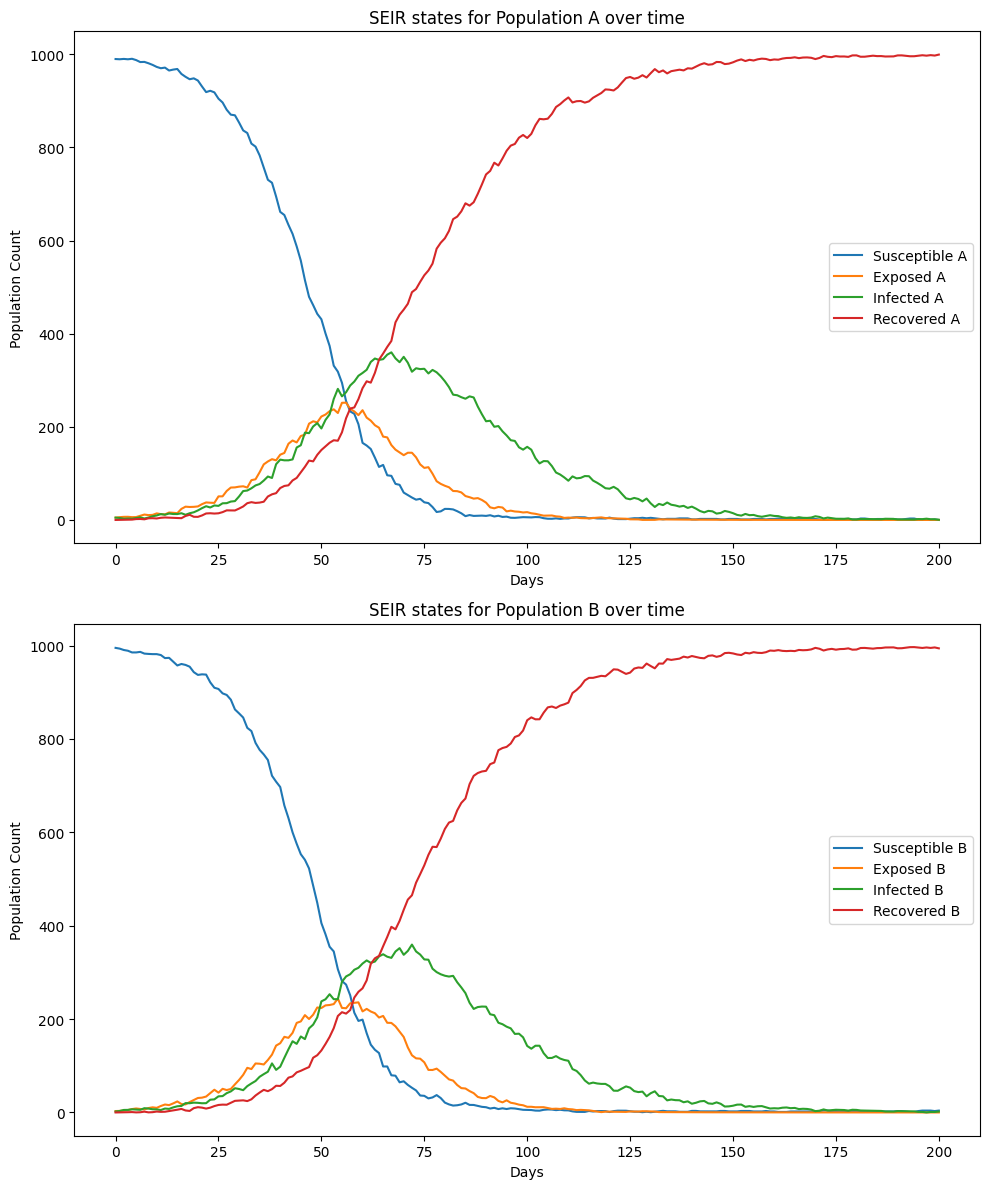

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_A = 1000
N_B = 1000
S_A, E_A, I_A, R_A = 990, 5, 5, 0
S_B, E_B, I_B, R_B = 995, 3, 2, 0
beta = 0.3
sigma = 0.1
gamma = 0.05
days = 200
m = 200

# Lists to track SEIR states over time
S_A_list, E_A_list, I_A_list, R_A_list = [S_A], [E_A], [I_A], [R_A]
S_B_list, E_B_list, I_B_list, R_B_list = [S_B], [E_B], [I_B], [R_B]

for day in range(days):
    # SEIR model equations for population A
    delta_S_A = -beta * S_A * I_A / N_A
    delta_E_A = beta * S_A * I_A / N_A - sigma * E_A
    delta_I_A = sigma * E_A - gamma * I_A
    delta_R_A = gamma * I_A
    
    S_A += delta_S_A
    E_A += delta_E_A
    I_A += delta_I_A
    R_A += delta_R_A
    
    # SEIR model equations for population B
    delta_S_B = -beta * S_B * I_B / N_B
    delta_E_B = beta * S_B * I_B / N_B - sigma * E_B
    delta_I_B = sigma * E_B - gamma * I_B
    delta_R_B = gamma * I_B
    
    S_B += delta_S_B
    E_B += delta_E_B
    I_B += delta_I_B
    R_B += delta_R_B
    
    # Swap m people between A and B
    states_A = np.array(['S'] * int(S_A) + ['E'] * int(E_A) + ['I'] * int(I_A) + ['R'] * int(R_A))
    states_B = np.array(['S'] * int(S_B) + ['E'] * int(E_B) + ['I'] * int(I_B) + ['R'] * int(R_B))
    
    moving_from_A = np.random.choice(states_A, m, replace=False)
    moving_from_B = np.random.choice(states_B, m, replace=False)
    
    # Update states based on the swap
    S_A, E_A, I_A, R_A = S_A - np.sum(moving_from_A == 'S') + np.sum(moving_from_B == 'S'), \
                         E_A - np.sum(moving_from_A == 'E') + np.sum(moving_from_B == 'E'), \
                         I_A - np.sum(moving_from_A == 'I') + np.sum(moving_from_B == 'I'), \
                         R_A - np.sum(moving_from_A == 'R') + np.sum(moving_from_B == 'R')
    
    S_B, E_B, I_B, R_B = S_B - np.sum(moving_from_B == 'S') + np.sum(moving_from_A == 'S'), \
                         E_B - np.sum(moving_from_B == 'E') + np.sum(moving_from_A == 'E'), \
                         I_B - np.sum(moving_from_B == 'I') + np.sum(moving_from_A == 'I'), \
                         R_B - np.sum(moving_from_B == 'R') + np.sum(moving_from_A == 'R')
    
    # Append states to lists
    S_A_list.append(S_A)
    E_A_list.append(E_A)
    I_A_list.append(I_A)
    R_A_list.append(R_A)
    
    S_B_list.append(S_B)
    E_B_list.append(E_B)
    I_B_list.append(I_B)
    R_B_list.append(R_B)

# Plotting the results
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes[0].plot(S_A_list, label='Susceptible A')
axes[0].plot(E_A_list, label='Exposed A')
axes[0].plot(I_A_list, label='Infected A')
axes[0].plot(R_A_list, label='Recovered A')
axes[0].set_title('SEIR states for Population A over time')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Population Count')
axes[0].legend()

axes[1].plot(S_B_list, label='Susceptible B')
axes[1].plot(E_B_list, label='Exposed B')
axes[1].plot(I_B_list, label='Infected B')
axes[1].plot(R_B_list, label='Recovered B')
axes[1].set_title('SEIR states for Population B over time')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Population Count')
axes[1].legend()

plt.tight_layout()
plt.show()
